In [1]:
import os
from pathlib import Path

testfolder = 'Simulations/fixedtilt'

if not os.path.exists(testfolder):
    os.makedirs(testfolder)
    
print ("Your simulation will be stored in %s" % testfolder)

Your simulation will be stored in Simulations/fixedtilt


In [2]:
import bifacial_radiance as br
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# This information helps with debugging and getting support :)
import sys, platform
print("Working on a ", platform.system(), platform.release())
print("Python version ", sys.version)
print("Pandas version ", pd.__version__)
print("bifacial_radiance version ", br.__version__)
print("pyplot ", plt.matplotlib.__version__)

Working on a  Darwin 21.6.0
Python version  3.11.5 (main, Sep 11 2023, 08:19:27) [Clang 14.0.6 ]
Pandas version  2.0.3
bifacial_radiance version  0.4.2+164.ge460768.dirty
pyplot  3.7.2


In [4]:
simulationname = 'fixedtilt-groundscan'

# Location:
lat = 39.7555
lon = -105.2211

# Scene Parameters:
azimuth_ang=90
tilt=10

# MakeModule Parameters
moduletype='PVmod'
numpanels=1
module_x = 2 # m
module_y = 1 # m. slope we will measure
sensorsy=2
sensorsground=5

# SceneDict Parameters
pitch = 5.7
albedo = 0.2
azimuth = 150
clearance_height = 0.2
nMods = 20 
nRows = 3

sceneDict = {'tilt':tilt,'pitch':pitch,'clearance_height':clearance_height,'azimuth':azimuth, 'nMods': nMods, 'nRows': nRows} 

In [5]:
demo = br.RadianceObj(simulationname,path = testfolder)
demo.setGround(albedo)
epwfile = demo.getEPW(lat, lon)

path = Simulations/fixedtilt
Loading albedo, 1 value(s), 0.200 avg
1 nonzero albedo values.
Getting weather file: USA_CO_Golden-NREL.724666_TMY3.epw
 ... OK!


In [6]:
module=demo.makeModule(name=moduletype,x=module_x,y=module_y)


Module Name: PVmod
Module PVmod updated in module.json
Pre-existing .rad file objects/PVmod.rad will be overwritten



In [7]:
#Valid options: mm_dd, mm_dd_HH, mm_dd_HHMM, YYYY-mm-dd_HHMM
metdata = demo.readWeatherFile(epwfile, coerce_year=2021, starttime='2021-06-21_12', endtime='2021-06-21_13')

8760 line in WeatherFile. Assuming this is a standard hourly WeatherFile for the year for purposes of saving Gencumulativesky temporary weather files in EPW folder.
Coercing year to 2021
Filtering dates
Saving file EPWs/metdata_temp.csv, # points: 8760
Calculating Sun position for Metdata that is right-labeled  with a delta of -30 mins. i.e. 12 is 11:30 sunpos


In [8]:
demo.gendaylit(timeindex=0)  

'skies/sky2_39.74_-105.18_2021-06-21_1200.rad'

In [9]:
scene = demo.makeScene(module,sceneDict)

In [10]:
octfile = demo.makeOct()

Created fixedtilt-groundscan.oct


In [11]:
analysis = br.AnalysisObj(octfile, demo.name)

In [12]:
sensorsgroundvalues = np.array([2, 3, 5, 10, 20, 30, 100, 150, 200, 250, 300, 400, 500])

In [16]:
results = []

for i, sensorsground in enumerate(sensorsgroundvalues):
    wm2 = []
    print(f"sensorsground: {sensorsground}")
    frontscan, backscan, groundscan = analysis.moduleAnalysis(scene, sensorsy=sensorsy, sensorsground=sensorsground)
    ground, back = analysis.analysis(octfile, "groundscan" + str(sensorsground), groundscan, backscan)
    print(ground)
    for i, x in enumerate(ground['x']):
        if x >= 1 and x <= pitch-1:
            wm2.append(ground['Wm2'])
    results.append(np.mean(wm2))
    print("")

sensorsground: 2
Linescan in process: groundscan2_Row2_Module10_Front
Linescan in process: groundscan2_Row2_Module10_Back
Saved: results/irr_groundscan2_Row2_Module10.csv
{'Wm2': [16.69261, 16.81084], 'x': [0.0, 2.85], 'y': [0.0, -4.936345], 'z': [0.05, 0.05], 'r': [16.69261, 16.81084], 'g': [16.69261, 16.81084], 'b': [16.69261, 16.81084], 'mattype': ['groundplane', 'groundplane'], 'title': 'groundscan2_Row2_Module10_Front'}

sensorsground: 3
Linescan in process: groundscan3_Row2_Module10_Front
Linescan in process: groundscan3_Row2_Module10_Back
Saved: results/irr_groundscan3_Row2_Module10_Front.csv
Saved: results/irr_groundscan3_Row2_Module10_Back.csv
{'Wm2': [16.92634, 958.9127, 16.39854], 'x': [0.0, 1.425, 2.85], 'y': [0.0, -2.468172, -4.936345], 'z': [0.05, 0.05, 0.05], 'r': [16.92634, 958.9127, 16.39854], 'g': [16.92634, 958.9127, 16.39854], 'b': [16.92634, 958.9127, 16.39854], 'mattype': ['groundplane', 'groundplane', 'groundplane'], 'title': 'groundscan3_Row2_Module10_Front'}

s

Linescan in process: groundscan150_Row2_Module10_Back
Saved: results/irr_groundscan150_Row2_Module10_Front.csv
Saved: results/irr_groundscan150_Row2_Module10_Back.csv
{'Wm2': [16.48551, 16.68226, 16.87902, 17.76668, 18.55641, 19.34614, 23.584950000000003, 24.70502, 25.82508, 39.65768, 41.5797, 43.50172, 896.1157, 900.6412, 905.1666, 933.1961, 939.5377, 945.8792, 946.8649, 948.9137999999999, 950.9626, 952.9072, 953.4053, 953.9035, 954.4017, 954.8998, 956.8077, 956.8524000000001, 956.8969000000001, 956.9415, 956.9861, 957.0306, 957.0753, 957.1198, 957.1644, 957.209, 957.2535000000001, 957.2981, 957.3427, 957.3873, 957.4319, 957.4764, 957.5210000000001, 957.5656, 957.6102, 959.4524, 959.4600999999999, 959.4679, 959.4756000000001, 959.4834, 959.4910999999998, 959.4989, 959.5067, 959.5144, 959.5222, 959.5299, 959.5377, 959.5454, 959.5532, 959.5609, 959.5687000000001, 959.5764, 959.5841999999999, 959.5919, 959.5997000000001, 959.12, 959.1238, 959.1276000000001, 959.1313, 959.1349999999999, 9

Linescan in process: groundscan200_Row2_Module10_Back
Saved: results/irr_groundscan200_Row2_Module10_Front.csv
Saved: results/irr_groundscan200_Row2_Module10_Back.csv
{'Wm2': [15.92805, 15.86312, 15.79819, 15.73327, 17.55659, 18.16836, 18.78012, 20.82508, 21.56925, 22.31343, 28.79266, 29.84656, 30.90046, 48.04195000000001, 49.78806, 854.4127, 896.1403, 899.536, 902.9317, 927.1703000000001, 931.7203, 936.2704, 941.5691, 944.3891, 947.2091, 950.0292, 949.8593999999999, 950.8156, 951.7718, 952.728, 953.6842, 954.6403999999999, 955.5966, 956.5528, 956.8419, 956.8719, 956.9019, 956.9318, 956.9617, 956.9916, 957.0215, 957.0515, 957.0814, 957.1113, 957.1412999999999, 957.1713, 957.2012, 957.2311, 958.9407, 958.9335, 958.9263, 958.9191999999999, 958.9119999999999, 958.9047999999999, 958.8977, 958.8905, 958.8833, 958.8762, 958.869, 958.8618, 958.8546, 958.8475, 958.8403, 958.8331, 959.3758000000001, 959.3783, 959.3807, 959.3831999999999, 959.3856, 959.3881, 959.3905, 959.393, 959.3954, 959.3979

Linescan in process: groundscan250_Row2_Module10_Back
Saved: results/irr_groundscan250_Row2_Module10_Front.csv
Saved: results/irr_groundscan250_Row2_Module10_Back.csv
{'Wm2': [16.90293, 16.96291, 17.0229, 17.08288, 17.7145, 18.12309, 18.53168, 18.94028, 20.45547, 21.03724, 21.619019999999995, 22.2008, 27.5806, 28.38811, 29.19561, 30.00312, 46.24877, 47.603289999999994, 48.95782, 853.1908, 895.4001, 898.0976999999999, 900.7950999999999, 903.4926, 928.0103, 931.6747, 935.3391, 939.0034, 942.8278999999999, 944.8312, 946.8344000000001, 948.8376, 950.8409, 950.8506000000001, 951.4813, 952.1119, 952.7425, 953.3731000000001, 954.0038, 955.3632000000001, 955.4249, 955.4865999999998, 955.5483, 955.6101, 955.6718, 955.7334999999999, 955.7953000000001, 955.8570999999998, 958.2482999999999, 958.2932999999999, 958.3383, 958.3833, 958.4283, 958.4733, 958.5183000000001, 958.5633000000001, 958.6083, 958.6533, 958.6983, 958.7433, 958.7883, 958.8332999999999, 958.8783, 959.4131000000001, 959.4218, 959.4

Linescan in process: groundscan300_Row2_Module10_Back
Saved: results/irr_groundscan300_Row2_Module10_Front.csv
Saved: results/irr_groundscan300_Row2_Module10_Back.csv
{'Wm2': [15.88923, 15.84601, 15.8028, 15.759589999999998, 15.71637, 17.21533, 17.55532, 17.89531, 18.23531, 18.5753, 20.34504, 20.83301, 21.32098, 21.80896, 22.29693, 28.6427, 29.34083, 30.03895, 30.737080000000002, 31.4352, 51.84799999999999, 53.11172, 54.37546, 858.5177, 859.7814, 904.4263, 906.8264, 909.2264, 911.6265, 914.0265, 932.5489000000001, 935.7096, 938.8702, 942.0309000000001, 945.1917, 945.2310000000001, 946.4928999999998, 947.7549, 949.0168, 950.2788999999999, 951.5408000000001, 951.759, 952.1934, 952.6279, 953.0624000000001, 953.4968, 953.9312999999999, 954.3657, 954.8002, 955.6698, 955.6824, 955.6951, 955.7076000000001, 955.7203, 955.7329, 955.7455, 955.7581, 955.7707999999999, 955.7833999999999, 955.7959999999999, 955.8086, 955.8212, 955.8339, 955.8464, 955.8591, 955.8717, 955.8843, 955.8969000000001, 958

Linescan in process: groundscan400_Row2_Module10_Back
Saved: results/irr_groundscan400_Row2_Module10_Front.csv
Saved: results/irr_groundscan400_Row2_Module10_Back.csv
{'Wm2': [16.81571, 16.82079, 16.82588, 16.83096, 16.83604, 16.84112, 16.62483, 16.86275, 17.10066, 17.33858, 17.57649, 17.81441, 19.4037, 19.75266, 20.10161, 20.45057, 20.79952, 21.14848, 25.3489, 25.79556, 26.24221, 26.688869999999998, 27.13552, 27.582180000000005, 39.57346, 40.2954, 41.01734, 41.73928, 42.46122, 43.18316000000001, 878.6367, 880.02, 881.4033, 882.7866, 884.1699, 885.5532, 918.1673, 920.2361, 922.3049, 924.3737, 926.4425, 928.5113, 937.6088, 939.5191, 941.4294, 943.3397, 945.2500999999999, 947.1604000000001, 949.0706999999999, 947.3403, 948.0063, 948.6724, 949.3384, 950.0044000000001, 950.6704999999998, 951.3365, 952.0026000000001, 952.6686, 953.3213, 953.4739, 953.6266, 953.7792, 953.9318, 954.0845, 954.2370999999999, 954.3898, 954.5423999999999, 954.695, 954.8476999999999, 955.0003, 956.4932, 956.4922, 

Linescan in process: groundscan500_Row2_Module10_Back
Saved: results/irr_groundscan500_Row2_Module10_Front.csv
Saved: results/irr_groundscan500_Row2_Module10_Back.csv
{'Wm2': [16.04479, 16.05924, 16.07369, 16.08814, 16.10259, 16.11705, 16.1315, 17.16888, 17.37827, 17.58766, 17.79705, 18.00643, 18.21582, 18.42521, 18.6346, 19.35313, 19.63286, 19.91258, 20.19231, 20.47203, 20.75175, 21.03148, 25.04355, 25.39994, 25.756340000000005, 26.11274, 26.46914, 26.82553, 27.181930000000005, 36.87956, 37.41356, 37.94755, 38.48155, 39.01555, 39.54955, 40.08355, 65.40355, 66.35727, 870.1895, 871.1432, 872.0969, 873.0506, 874.0043, 909.7343, 911.2965, 912.8588, 914.4211, 915.9834, 917.5457, 919.1079999999998, 932.0277, 933.9095000000001, 935.7914, 937.6733, 939.5552000000001, 941.4371, 943.3188999999999, 943.4321, 944.3273, 945.2226, 946.1178, 947.0131, 947.9083, 948.8035, 949.6987, 950.5939, 950.9865, 951.2701000000001, 951.5539, 951.8376, 952.1213000000001, 952.4051, 952.6888, 952.9725, 953.2563, 95

In [17]:
results

[16.751725,
 330.74585999999994,
 581.100424,
 761.8085429999999,
 724.942811,
 740.237629,
 777.7382779000001,
 775.4154406666667,
 782.28465095,
 783.28596108,
 781.1630084999999,
 782.6605489499999,
 781.78821586]

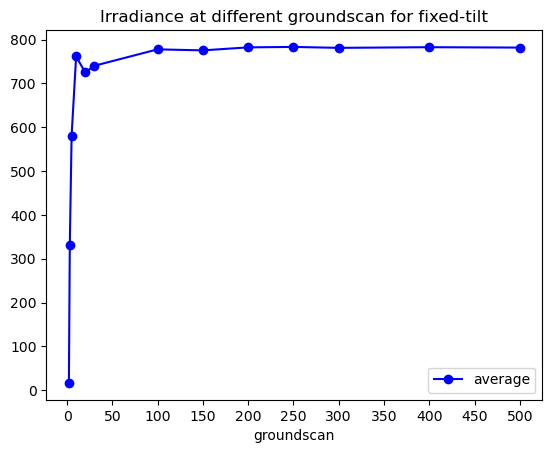

In [18]:
df = pd.DataFrame({
    'groundscan': sensorsgroundvalues,
    'average': results
})

df.plot(x='groundscan', y='average', marker='o', color='blue')
plt.xticks(np.arange(0, 501, 50))
plt.title('Irradiance at different groundscan for fixed-tilt')
plt.show()